# GCP BigQuery


## 1. Birth counts

In [1]:
%load_ext google.cloud.bigquery

See results of a query

In [2]:
%%bigquery
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


Save to a pandas dataframe + just write df name after magic

In [3]:
%%bigquery total_births
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

In [5]:
total_births

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


In [6]:
%matplotlib inline

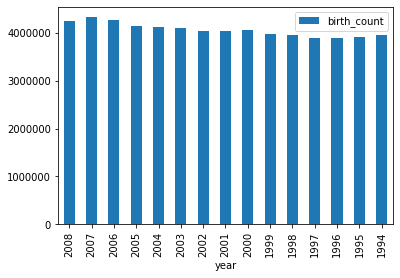

In [7]:
total_births.plot(kind='bar', x='year', y='birth_count');

In [8]:
%%bigquery births_by_weekday
SELECT
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `bigquery-public-data.samples.natality`
WHERE wday IS NOT NULL
GROUP BY wday
ORDER BY wday ASC

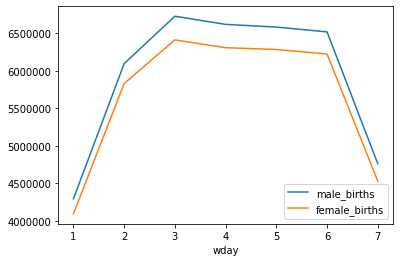

In [9]:
births_by_weekday.plot(x='wday');

## use the BigQuery Python client library

In [10]:
from google.cloud import bigquery
client = bigquery.Client()

In [11]:
sql = """
SELECT
    plurality,
    COUNT(1) AS count,
    year
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(plurality) AND plurality > 1
GROUP BY
    plurality, year
ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


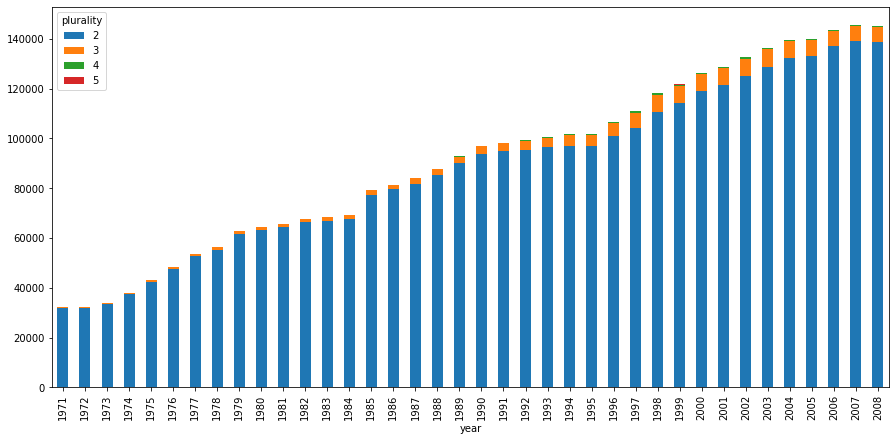

In [12]:
pivot_table = df.pivot(index='year', columns='plurality', values='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7));

In [13]:
sql = """
SELECT
    gestation_weeks,
    COUNT(1) AS count
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
GROUP BY
    gestation_weeks
ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()

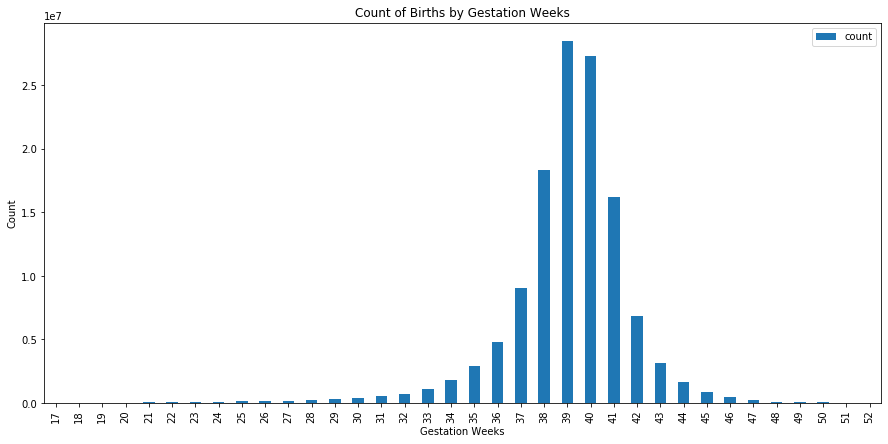

In [14]:
ax = df.plot(kind='bar', x='gestation_weeks', y='count', figsize=(15,7))
ax.set_title('Count of Births by Gestation Weeks')
ax.set_xlabel('Gestation Weeks')
ax.set_ylabel('Count');

## 2. USA Names

In [17]:
from google.cloud import bigquery

client = bigquery.Client()
#client = bigquery.Client(project='PROJECT_ID') #if u want to pass a project not in same env


# Perform a query.
QUERY = (
    'SELECT name FROM `bigquery-public-data.usa_names.usa_1910_2013` '
    'WHERE state = "TX" '
    'LIMIT 100')
query_job = client.query(QUERY)  # API request
rows = query_job.result()  # Waits for query to finish

for row in rows:
    print(row.name)

Frances
Alice
Beatrice
Ella
Gertrude
Josephine
Lula
Blanche
Marjorie
Christine
Margarita
Alta
Sara
Naomi
Sofia
Andrea
Delfina
Dominga
Elnora
Adele
Rafaela
Dixie
Luisa
Bess
Ernestine
Lorine
Patsy
Cecelia
Enriqueta
Lucinda
Alyce
Oneta
Apolonia
Gloria
Rhoda
Buna
Maye
Pansy
Gladys
Maria
Helen
Velma
Clara
Anna
Evelyn
Rosa
Mae
Bernice
Stella
Vivian
Mable
Maggie
Betty
Guadalupe
Lorene
Susie
Sadie
Erma
Verna
Amelia
Estelle
Nell
Margie
Celia
Lessie
Eloise
Millie
Olga
Letha
Rachel
Luz
Gussie
Sylvia
Aline
Barbara
Iris
Leila
Mozelle
Simona
Catalina
Hester
Willia
Allene
Avis
George
Isabella
Polly
Syble
Teodora
Lennie
Ricarda
Valerie
Frances
Gertrude
Sarah
Rosa
Lucy
Nora
Nettie
Odessa


In [18]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

query = """
    SELECT name, SUM(number) as total_people
    FROM `bigquery-public-data.usa_names.usa_1910_2013`
    WHERE state = 'TX'
    GROUP BY name, state
    ORDER BY total_people DESC
    LIMIT 20
"""
query_job = client.query(query)  # Make an API request.

print("The query data:")
for row in query_job:
    # Row values can be accessed by field name or index.
    print("name={}, count={}".format(row[0], row["total_people"]))

The query data:
name=James, count=272793
name=John, count=235139
name=Michael, count=225320
name=Robert, count=220399
name=David, count=219028
name=Mary, count=209893
name=William, count=173092
name=Jose, count=157362
name=Christopher, count=144196
name=Maria, count=131056
name=Charles, count=126509
name=Daniel, count=117470
name=Richard, count=109888
name=Juan, count=109808
name=Jennifer, count=98696
name=Joshua, count=90679
name=Elizabeth, count=90465
name=Joseph, count=89097
name=Matthew, count=88464
name=Joe, count=87977


# check size of your query
Acho q nao e cobrado..

In [19]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

job_config = bigquery.QueryJobConfig(dry_run=True, use_query_cache=False)

# Start the query, passing in the extra configuration.
query_job = client.query(
    (
        "SELECT name, COUNT(*) as name_count "
        "FROM `bigquery-public-data.usa_names.usa_1910_2013` "
        "WHERE state = 'WA' "
        "GROUP BY name"
    ),
    job_config=job_config,
)  # Make an API request.

# A dry run query completes immediately.
print("This query will process {} bytes.".format(query_job.total_bytes_processed))

This query will process 65935918 bytes.


In [21]:
query_job.total_bytes_processed/1000000

65.935918

ACS Data



In [32]:
%%bigquery ACS_2014
SELECT *
FROM `bigquery-public-data.census_bureau_acs.county_2014_1yr`

In [36]:
ACS_2014.to_csv('ACS_2014.csv')

In [45]:
%%bigquery ACS_2013
SELECT *
FROM `bigquery-public-data.census_bureau_acs.county_2013_1yr`

In [46]:
ACS_2013.to_csv('ACS_2013.csv')

In [60]:
%%bigquery airquality
SELECT 
state_code,
county_code,
site_num,
parameter_code,
latitude, 
longitude ,
datum, 
parameter_name,
metric_used,
method_name,
year, 
units_of_measure,
arithmetic_mean,
arithmetic_standard_dev


FROM `bigquery-public-data.epa_historical_air_quality.air_quality_annual_summary`
WHERE year = 2013

KeyboardInterrupt: 

In [ ]:
airquality.to_csv('airquality.csv')

In [52]:
%%bigquery UScounty_boundaries
SELECT 
geo_id,
area_land_meters,
area_water_meters,
int_point_lat,
int_point_lon


FROM `bigquery-public-data.geo_us_boundaries.counties`


In [53]:

UScounty_boundaries.to_csv('UScounty_boundaries.csv')

In [54]:
%%bigquery USadjacent_counties
SELECT *

FROM `bigquery-public-data.geo_us_boundaries.adjacent_counties`



In [55]:
USadjacent_counties.to_csv('USadjacent_counties.csv')